In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [4]:
df=pd.read_csv("p-400-NB-20200908.xv", skiprows=(16), delimiter="\t",names=["x","y"])

Verifica as primeiras linhas, se importou direito

In [5]:
print (df.head(2))

          x         y
0  0.946295  0.000000
1  0.957374 -1.962518


In [6]:
print (df.loc[5:,["x","y"]])

            x         y
5    1.001690 -1.680396
6    1.012769 -0.313158
7    1.023848 -1.216954
8    1.034927 -0.903949
9    1.046006 -0.520208
..        ...       ...
395  5.322476 -3.366679
396  5.333555 -4.951277
397  5.344634 -5.278665
398  5.355713 -2.134362
399  5.366792  0.000000

[395 rows x 2 columns]


Tira os pontos das pontas:

In [7]:
df["x"]=df.loc[9:390,"x"]

Inverte o sinal de x (se quiser):

In [8]:
df["x"]=df["x"] * 1

Coloca o início da simulação em ZERO:

In [12]:
df["y"]=df["y"] +0.5

Imprime o máximo e o mínimo da curva

In [13]:
#perfil200.min()
y_min=truncate(df["y"].min(),2)
y_max=truncate(df["y"].max(),2)
delta=truncate((y_max - y_min),2)
print('min:',y_min, 'max:',y_max,'delta:',delta)

min: -4.77 max: 1.27 delta: 6.03


gera o gráfico

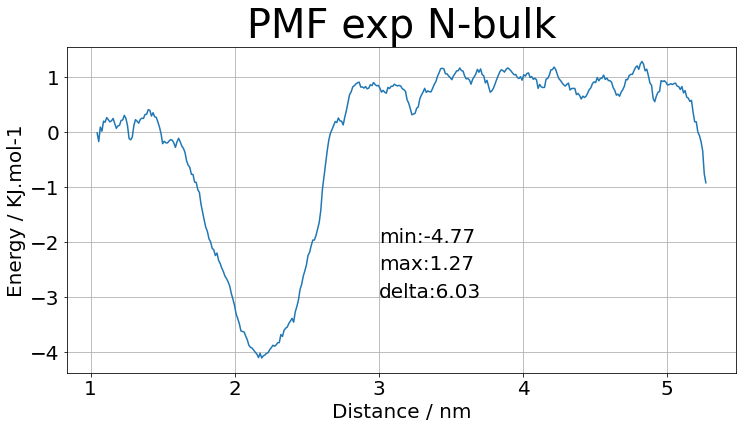

In [14]:
p = df.plot.line(x="x",y="y", grid=True, legend=False,figsize=(12,6))
p.set_title("PMF exp N-bulk", size=40)
p.set_xlabel("Distance / nm", size=20)
p.set_ylabel("Energy / KJ.mol-1", size=20)
p.text(3,-2,'min:'+str(y_min), size=20)
p.text(3,-2.5,'max:'+str(y_max),size=20)
p.text(3,-3,'delta:'+str(delta),size=20)
p.tick_params(labelsize=20)
plt.show()

Salva o plot em arquivo

In [15]:
p.get_figure().savefig("pmfEXP-N-bulk.20200904.png")